# I am using the Heart Disease data set from the UCI repository to predict whether people develop heart disease. 

### In lieu of using the available processed data with 14 attributes in CSV format, I am starting with the complete dataset of 76 attributes. 

   #### Task1: Put data in dataframe and remove irrelevant columns. 
   #### Task2: Look for NaNs or missing values. 
   #### Task3: Explore data - see which fetaures are relevant. 
   #### Task4: Pick some models to test. 
   #### Task5: Look for NaNs or missing values. 


### Task 1 Getting data together

In [1]:
import io
import requests
import pandas as pd
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/hungarian.data'
r = requests.get(url)
#if r.status_code != requests.codes.ok:
   # r.raise_for_status()

data = r.text.replace('\n', ' ').replace(' name ', ' name\n')

hungary = pd.read_table(io.StringIO(data), sep='\s+', header=None)
print(hungary)

       0   1   2   3   4   5   6   7   8    9   ...   66  67  68  69  70  71  \
0    1254   0  40   1   1   0   0  -9   2  140  ...   -9  -9   1   1   1   1   
1    1255   0  49   0   1   0   0  -9   3  160  ...   -9  -9   1   1   1   1   
2    1256   0  37   1   1   0   0  -9   2  130  ...   -9  -9   1   1   1   1   
3    1257   0  48   0   1   1   1  -9   4  138  ...    2  -9   1   1   1   1   
4    1258   0  54   1   1   0   1  -9   3  150  ...    1  -9   1   1   1   1   
5    1259   0  39   1   1   0   1  -9   3  120  ...   -9  -9   1   1   1   1   
6    1260   0  45   0   0   1   0  -9   2  130  ...   -9  -9   1   1   1   1   
7    1261   0  54   1   1   0   0  -9   2  110  ...   -9  -9   1   1   1   1   
8    1262   0  37   1   1   1   1  -9   4  140  ...   -9  -9   1   1   1   1   
9    1263   0  48   0   1   0   0  -9   2  120  ...   -9  -9   1   1   1   1   
10   1264   0  37   0   1   0   1  -9   3  130  ...   -9  -9   1   1   1   1   
11   1265   0  58   1   1   0   0  -9   

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/long-beach-va.data'
r = requests.get(url)
#if r.status_code != requests.codes.ok:
   # r.raise_for_status()

data1 = r.text.replace('\n', ' ').replace(' name ', ' name\n')

lb = pd.read_table(io.StringIO(data1), sep='\s+', header=None)
print(lb)

      0   1   2   3   4   5   6   7   8    9   ...   66  67  68  69  70  71  \
0      1   0  63   1   1   1   1  -9   4  140  ...    2   1   1   1   1   1   
1      2   0  44   1   1   1   1  -9   4  130  ...    1   1   1   1   1   1   
2      3   0  60   1   1   1   1  -9   4  132  ...    2   1   1   1   1   7   
3      4   0  55   1   1   1   1  -9   4  142  ...    1   1   1   1   1   1   
4      5   0  66   1   1   0   0  -9   3  110  ...    1   1   1   1   1   1   
5      6   0  66   1   1   0   1  -9   3  120  ...    1   1   1   1   1   1   
6      7   0  65   1   1   1   1  -9   4  150  ...    2   2   1   1   1   7   
7      8   0  60   1   1   0   0  -9   3  180  ...    1   1   1   1   1   1   
8      9   0  60   1   1   0   1  -9   3  120  ...    2   1   1   1   1   1   
9     10   0  60   1   0   0   0  -9   2  160  ...    1   1   1   1   1   1   
10    11   0  56   1   1   0   0  -9   2  126  ...    1   1   1   1   1   1   
11    12   0  59   1   1   1   1  -9   4  140  ...  

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/switzerland.data'
r = requests.get(url)
#if r.status_code != requests.codes.ok:
   # r.raise_for_status()

data2 = r.text.replace('\n', ' ').replace(' name ', ' name\n')

switz = pd.read_table(io.StringIO(data2), sep='\s+', header=None)
print(switz)

       0   1   2   3   4   5   6   7   8    9   ...   66  67  68  69  70  71  \
0    3001   0  65   1   1   1   1  -9   4  115  ...    1   1   1   1   1   1   
1    3002   0  32   1   0   0   0  -9   1   95  ...    1   1   1   1   1   5   
2    3003   0  61   1   1   1   1  -9   4  105  ...    2   1   1   1   1   1   
3    3004   0  50   1   1   1   1  -9   4  145  ...    1   1   1   1   1   5   
4    3005   0  57   1   1   1   1  -9   4  110  ...    2   1   1   1   1   1   
5    3006   0  51   1   1   1   1  -9   4  110  ...    1   1   1   1   1   1   
6    3007   0  47   1   1   1   1  -9   4  110  ...    1   1   1   1   1   1   
7    3008   0  60   1   1   1   1  -9   4  160  ...    1   2  -9  -9  -9  -9   
8    3009   0  55   1   0   0   0  -9   2  140  ...    1   1   1   1   1   1   
9    3010   0  53   1   1   1   1  -9   4  125  ...    1   1   1   1   1   1   
10   3011   0  62   0   1   1   1  -9   4  120  ...    1   1   1   1   1   1   
11   3012   0  51   1   1   1   1  -9   

In [4]:
col_list = [2,3,8,9,11,14,15,16,17,18,31,32,33,34,37,39,40,43,50,57]
            
hungary=hungary[col_list]
lb = lb[col_list]
switz=switz[col_list]

In [5]:
switz.head(5) #Just checking to see I cut this down correctly

,2,3,8,9,11,14,15,16,17,18,31,32,33,34,37,39,40,43,50,57
0,65,1,4,115,0,-9,0,-9,-9,0,93,56,185,80,1,0.0,2,-9,7,1
1,32,1,1,95,0,-9,-9,-9,-9,0,127,74,160,75,0,0.7,1,-9,-9,1
2,61,1,4,105,0,-9,-9,-9,-9,0,110,70,155,90,1,1.5,1,-9,-9,1
3,50,1,4,145,0,-9,-9,-9,-9,0,139,82,180,95,1,0.7,2,-9,-9,1
4,57,1,4,110,0,-9,-9,-9,-9,1,131,71,145,80,1,1.4,1,1,-9,3


In [6]:
frames = [hungary, lb, switz] #Now I want to merge all 3 dataframes and then I will label the columns
df = pd.concat(frames)
df #Why didn't merge work here? pd.merge produces the correct columns but 0 rows

,2,3,8,9,11,14,15,16,17,18,31,32,33,34,37,39,40,43,50,57
0,40,1,2,140,289,-9,0,-9,-9,0,172,86,200,110,0,0.0,-9,-9,-9,0
1,49,0,3,160,180,-9,0,-9,-9,0,156,100,220,106,0,1.0,2,-9,-9,1
2,37,1,2,130,283,-9,0,-9,-9,1,98,58,180,100,0,0.0,-9,-9,-9,0
3,48,0,4,138,214,-9,0,-9,-9,0,108,54,210,106,1,1.5,2,-9,-9,3
4,54,1,3,150,-9,-9,0,-9,-9,0,122,74,130,100,0,0.0,-9,-9,-9,0
5,39,1,3,120,339,-9,0,-9,-9,0,170,86,198,100,0,0.0,-9,-9,-9,0
6,45,0,2,130,237,-9,0,-9,-9,0,170,90,200,106,0,0.0,-9,-9,-9,0
7,54,1,2,110,208,-9,0,-9,-9,0,142,56,220,70,0,0.0,-9,-9,-9,0
8,37,1,4,140,207,-9,0,-9,-9,0,130,63,190,100,1,1.5,2,-9,-9,1
9,48,0,2,120,284,-9,0,-9,-9,0,120,72,140,80,0,0.0,-9,-9,-9,0


In [7]:
df.columns=['age','sex','cp_type','rest_bp','chol','yrs_smoke','fbs','hist_dm','hist_cad','rest_ecg','max_hr','rest_hr',
                'ex_bp1','ex_bp2','exang','oldpeak','slope','ca','thal','outcome']
#These are the new column labels

In [8]:
df.head(5) #yay - worked so far!

,age,sex,cp_type,rest_bp,chol,yrs_smoke,fbs,hist_dm,hist_cad,rest_ecg,max_hr,rest_hr,ex_bp1,ex_bp2,exang,oldpeak,slope,ca,thal,outcome
0,40,1,2,140,289,-9,0,-9,-9,0,172,86,200,110,0,0.0,-9,-9,-9,0
1,49,0,3,160,180,-9,0,-9,-9,0,156,100,220,106,0,1.0,2,-9,-9,1
2,37,1,2,130,283,-9,0,-9,-9,1,98,58,180,100,0,0.0,-9,-9,-9,0
3,48,0,4,138,214,-9,0,-9,-9,0,108,54,210,106,1,1.5,2,-9,-9,3
4,54,1,3,150,-9,-9,0,-9,-9,0,122,74,130,100,0,0.0,-9,-9,-9,0


## Task 2: Looking for Null values or missing values

In [19]:
df.info() #So far everything is not null, but I'll come back to this as some of the negative numbers above are concerning

<class 'pandas.core.frame.DataFrame'>
Int64Index: 617 entries, 0 to 122
Data columns (total 20 columns):
age          617 non-null int64
sex          617 non-null int64
cp_type      617 non-null int64
rest_bp      617 non-null int64
chol         617 non-null int64
yrs_smoke    617 non-null int64
fbs          617 non-null int64
hist_dm      617 non-null int64
hist_cad     617 non-null int64
rest_ecg     617 non-null int64
max_hr       617 non-null int64
rest_hr      617 non-null int64
ex_bp1       617 non-null int64
ex_bp2       617 non-null int64
exang        617 non-null int64
oldpeak      617 non-null float64
slope        617 non-null int64
ca           617 non-null int64
thal         617 non-null int64
outcome      617 non-null int64
dtypes: float64(1), int64(19)
memory usage: 101.2 KB


## Task 3: Exploring the data

In [9]:
#### Are age and sex related to heart disease?

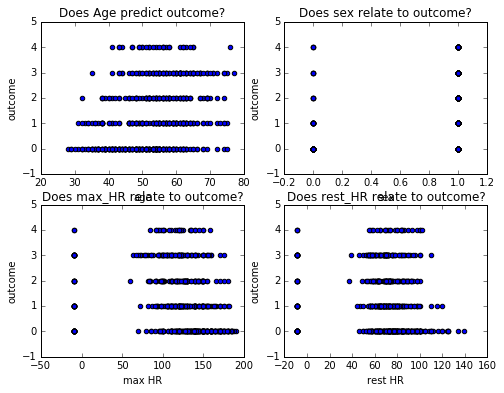

In [10]:
fig = plt.figure(figsize=(8,6))

ax1 = fig.add_subplot(221)
ax1.scatter(df.age,df.outcome)
plt.xlabel('age')
plt.ylabel('outcome')
plt.title('Does Age predict outcome?')

ax2 = fig.add_subplot(222)
ax2.scatter(df.sex,df.outcome)
plt.xlabel('sex')
plt.ylabel('outcome')
plt.title('Does sex relate to outcome?')

ax3 = fig.add_subplot(223)
ax3.scatter(df.max_hr,df.outcome)
plt.xlabel('max HR')
plt.ylabel('outcome')
plt.title('Does max_HR relate to outcome?')

ax4 = fig.add_subplot(224)
ax4.scatter(df.rest_hr,df.outcome)
plt.xlabel('rest HR')
plt.ylabel('outcome')
plt.title('Does rest_HR relate to outcome?')

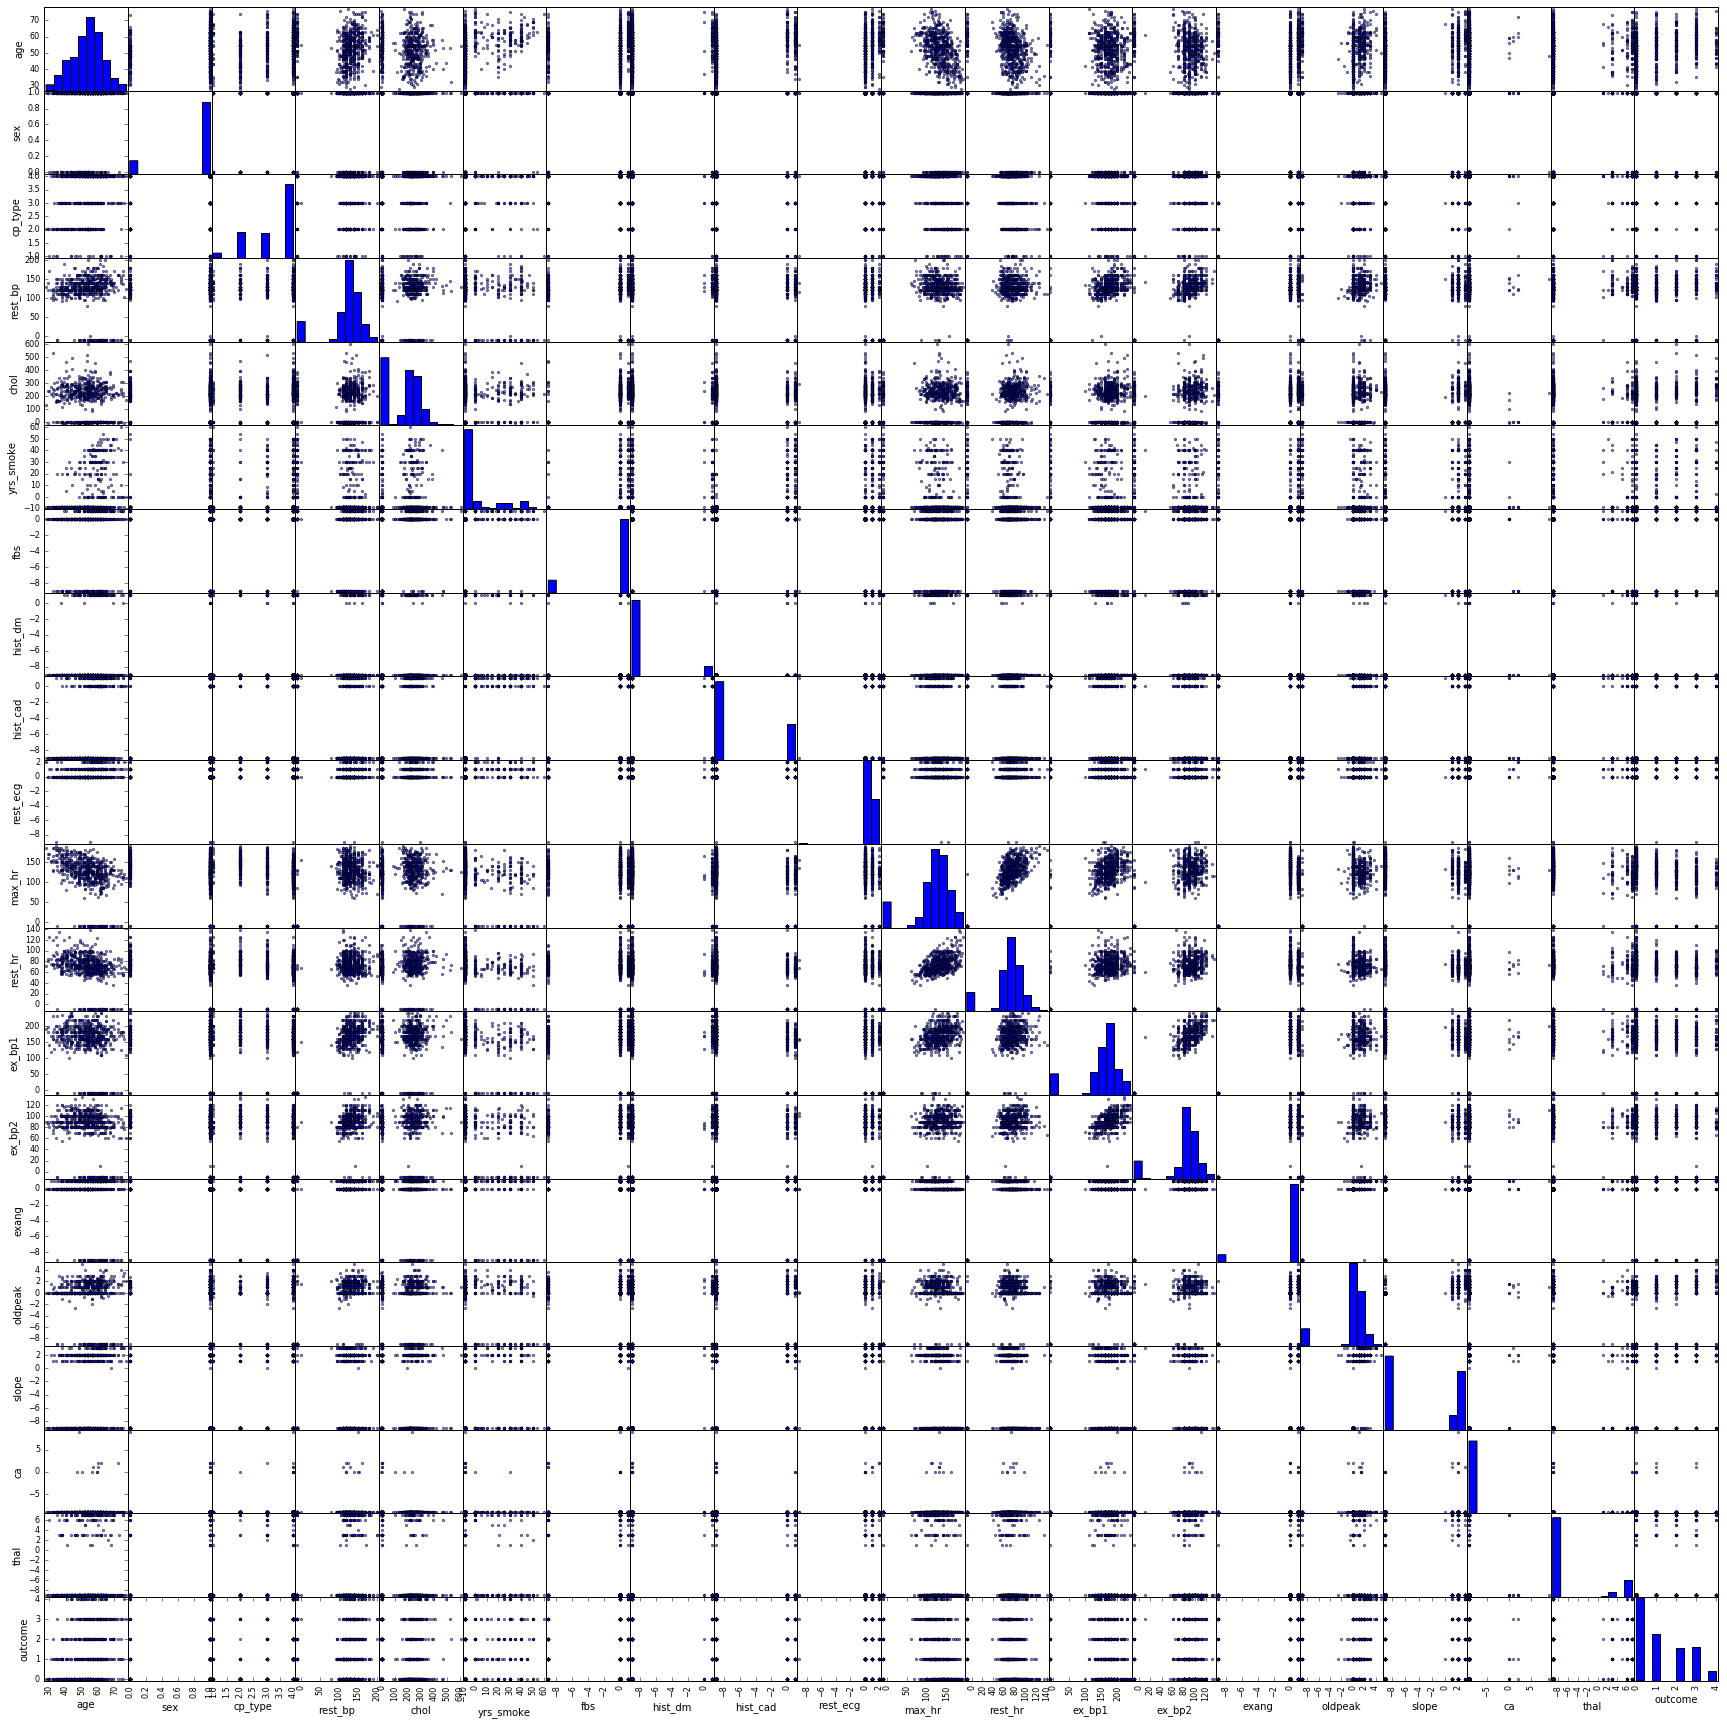

In [22]:
#Plotting one-by-one seems tedious. Lets try something different - is this overkill though? Do I need to normalize mean
#and stds for continous variables?
from pandas.tools.plotting import scatter_matrix
plot = scatter_matrix(df, figsize=(30, 30))

(array([  55.,    0.,    0.,    5.,   22.,   97.,  169.,  156.,   80.,   33.]),
 array([  -9. ,   10.9,   30.8,   50.7,   70.6,   90.5,  110.4,  130.3,
         150.2,  170.1,  190. ]),
 <a list of 10 Patch objects>)

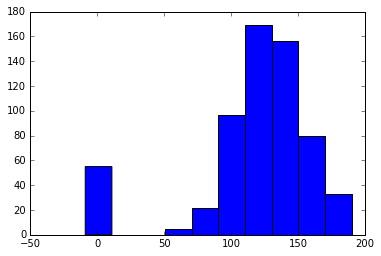

In [11]:
# Something funny is going on with the HRs - why are there negative numbers? Going to explore this
plt.hist(df.max_hr) # Need to find and drop these 0s 

In [12]:
max_hr_null = df[df.max_hr.isnull()]
print max_hr_null #Nothing is null but maybe some are 0? 

Empty DataFrame
Columns: [age, sex, cp_type, rest_bp, chol, yrs_smoke, fbs, hist_dm, hist_cad, rest_ecg, max_hr, rest_hr, ex_bp1, ex_bp2, exang, oldpeak, slope, ca, thal, outcome]
Index: []


In [13]:
max_hr_0 = df[df.max_hr == 0]
print max_hr_0 #Nothing is 0 so maybe some are negative?

Empty DataFrame
Columns: [age, sex, cp_type, rest_bp, chol, yrs_smoke, fbs, hist_dm, hist_cad, rest_ecg, max_hr, rest_hr, ex_bp1, ex_bp2, exang, oldpeak, slope, ca, thal, outcome]
Index: []


In [14]:
max_hr_neg = df[df.max_hr <= 0]
print max_hr_neg #Nothing is 0 so maybe some are negative?

     age  sex  cp_type  rest_bp  chol  yrs_smoke  fbs  hist_dm  hist_cad  \
289   48    0        2       -9   308         -9    0       -9        -9   
13    63    1        3       -9     0          3    0       -9         1   
23    74    1        3       -9     0         40    0       -9         0   
26    51    1        4       -9     0         30    1        1         1   
29    55    1        3       -9   228         30    0       -9         0   
30    54    1        4       -9     0         40    0       -9         1   
36    60    1        4       -9   281         47    0       -9         0   
38    58    1        4       -9   203         40    1       -9         1   
44    57    1        4       -9   277         25    1       -9         1   
51    63    0        2       -9     0         54    0       -9         1   
57    60    1        3       -9   316         40    1       -9         0   
58    62    1        2       -9     0         15    0       -9         0   
60    51    

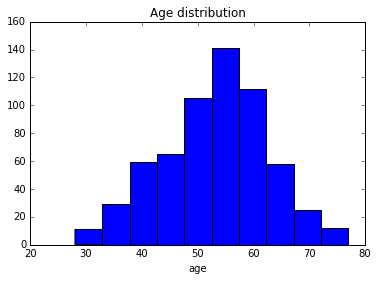

In [16]:
plt.hist(df.age)
plt.title('Age distribution')
plt.xlabel('age')
#Just getting a feel for the sample in this datset - mean age is around 55